# **Feature Transformation Demo**

In [1]:
!git clone https://github.com/ronigot/Flight-Price-Analysis.git

Cloning into 'Flight-Price-Analysis'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 75 (delta 18), reused 50 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 1.58 MiB | 6.90 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
import sys
import importlib.util

sys.path.append("/content/Flight-Price-Analysis/final_project/src")

spec1 = importlib.util.spec_from_file_location("feature_transformation_recommender", "/content/Flight-Price-Analysis/final_project/src/feature_transformation_recommender.py")
feature_transformation_recommender = importlib.util.module_from_spec(spec1)
spec1.loader.exec_module(feature_transformation_recommender)

spec2 = importlib.util.spec_from_file_location("basic_evaluator", "/content/Flight-Price-Analysis/final_project/src/basic_evaluator.py")
basic_evaluator = importlib.util.module_from_spec(spec2)
spec2.loader.exec_module(basic_evaluator)

In [3]:
import pandas as pd

Load California Housing dataset:

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

In [6]:
# Split features and target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [7]:
# Initialize the recommender and evaluator
recommender = feature_transformation_recommender.FeatureTransformationRecommender(model_type='linear', min_improvement=0.01, cv_folds=3)
evaluator = basic_evaluator.BasicEvaluator()

In [8]:
# Fit and transform the training data
X_transformed = recommender.fit_transform(X, y)

# Pass the transformations dictionary to the evaluator using the setter
evaluator.set_transformations(recommender.transformations)

# Compute metrics and evaluate model performance
metrics = evaluator.compute_metrics(X, X_transformed)
evaluator.evaluate_model_performance(X, X_transformed, y, model_type='linear')

Using Linear Regression model for evaluation.
Training and evaluating model on original data...
Training and evaluating model on transformed data...
Model evaluation complete.


In [9]:
# Print the summary of evaluation metrics and model performance
evaluator.print_summary()

=== Transformation Evaluation Summary ===

Selected Transformations:
+------------+----------------+
| Feature    | Transformation |
+------------+----------------+
| MedInc     | none           |
| HouseAge   | quantile       |
| AveRooms   | none           |
| AveBedrms  | sqrt           |
| Population | none           |
| AveOccup   | quantile       |
| Latitude   | none           |
| Longitude  | none           |
+------------+----------------+

Statistical Metrics:
+------------+---------------------------+---------------------------+------------------------------------+
| Feature    | Skewness (before → after) | Kurtosis (before → after) | Normality p-value (before → after) |
+------------+---------------------------+---------------------------+------------------------------------+
| MedInc     |             1.647 → 1.647 |             4.951 → 4.951 |                      0.000 → 0.000 |
| HouseAge   |             0.060 → 1.817 |            -0.801 → 4.223 |                      0

In [10]:
# Display only features that underwent transformation
# evaluator.plot_feature_distributions(X, X_transformed)

In [11]:
# Display all features
# evaluator.plot_feature_distributions(X, X_transformed, feature='all')

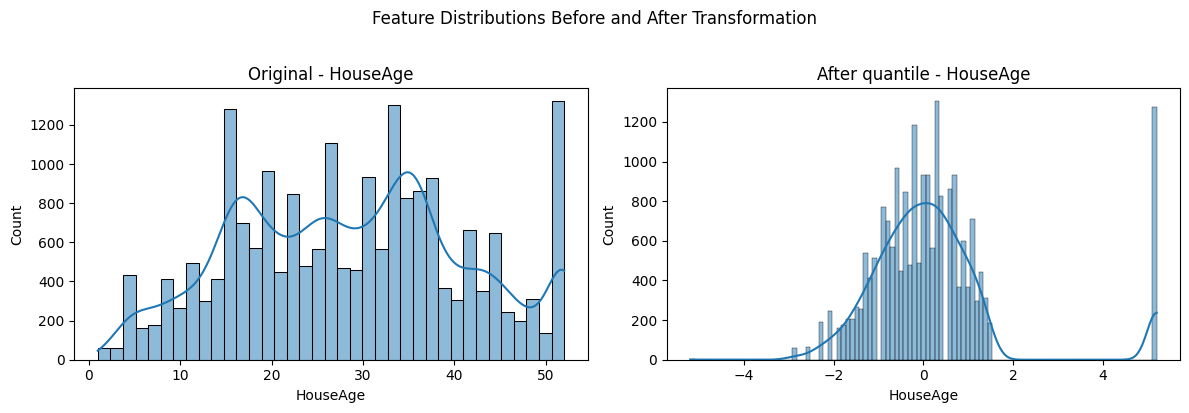

In [12]:
# Display a specific feature
evaluator.plot_feature_distributions(X, X_transformed, feature='HouseAge')

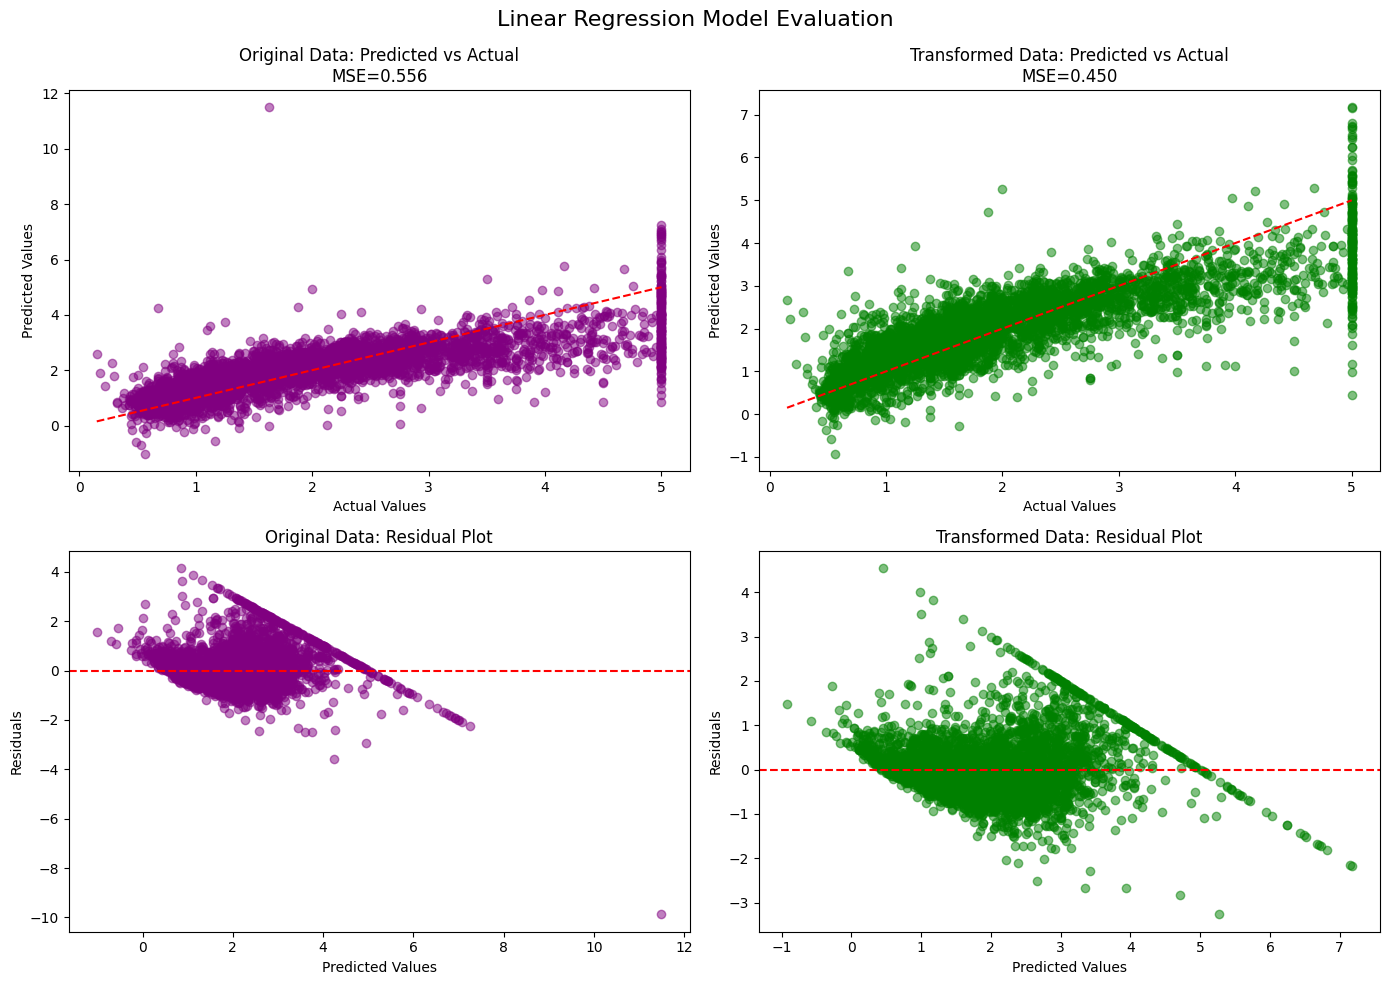

MSE Improvement: 19.0%


In [13]:
# Show comprehensive model evaluation
evaluator.plot_model_evaluation()

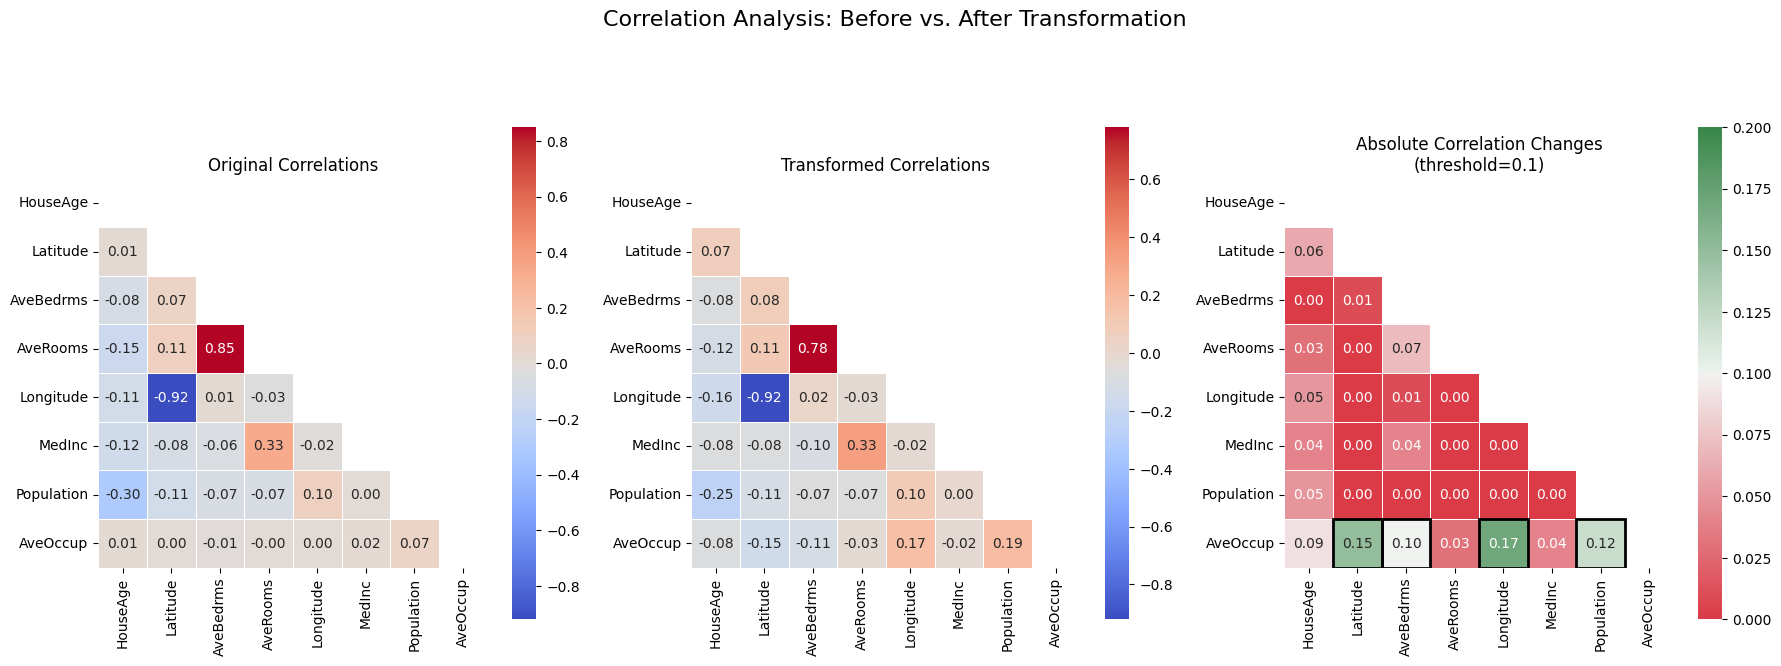


Significant correlation changes (|Δr| ≥ 0.10):
Feature 1       Feature 2       Original r      Transformed r   Change |Δr|    
---------------------------------------------------------------------------
Longitude       AveOccup        0.00            0.17            0.17           
Latitude        AveOccup        0.00            -0.15           0.15           
Population      AveOccup        0.07            0.19            0.12           
AveBedrms       AveOccup        -0.01           -0.11           0.10           


In [14]:
# Show correlation heatmaps
evaluator.plot_correlation_heatmap(X, X_transformed)